In [361]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,  mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

In [362]:
df_train = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")
df_sample = pd.read_csv("Data/sample_submission.csv")

In [363]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [364]:
df_train.shape

(1460, 81)

In [365]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [366]:
df_test.shape

(1459, 80)

In [367]:
df_train.drop(columns="Id", inplace=True, axis=1)
df_test.drop(columns="Id", inplace=True, axis=1)

In [368]:
pd.set_option('display.max_columns', None)

In [369]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [370]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [371]:
df_train.duplicated().sum()

0

In [372]:
df_train.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [373]:
null_cols = ["PoolQC", "MiscFeature", "Alley", "Fence"]

In [374]:
df_train.drop(columns=null_cols, inplace=True, axis= 1)
df_test.drop(columns=null_cols, inplace=True, axis= 1)

In [375]:
df_train.shape

(1460, 76)

In [376]:
df_test.shape

(1459, 75)

In [377]:
df_train.isnull().sum().sort_values(ascending=False).head(10)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
dtype: int64

In [378]:
df_test.isnull().sum().sort_values(ascending=False).head(10)

FireplaceQu     730
LotFrontage     227
GarageQual       78
GarageFinish     78
GarageCond       78
GarageYrBlt      78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
dtype: int64

In [379]:
df_test["FireplaceQu"].fillna("Unknown", inplace=True)
df_train["FireplaceQu"].fillna("Unknown", inplace=True)


In [380]:
front_mean_train = df_train["LotFrontage"].mean()
front_mean_test = df_test["LotFrontage"].mean()
df_train["LotFrontage"].fillna(front_mean_train, inplace=True)
df_test["LotFrontage"].fillna(front_mean_test, inplace=True)

In [381]:
most_GarageType_train = df_train["GarageType"].value_counts().index[0]
most_GarageType_test = df_test["GarageType"].value_counts().index[0]
df_train["GarageType"].fillna(most_GarageType_train, inplace=True)
df_test["GarageType"].fillna(most_GarageType_test, inplace=True)

In [382]:
GarageYrBlt_train = df_train["GarageYrBlt"].mean()
GarageYrBlt_test = df_test["GarageYrBlt"].mean()
df_train["GarageYrBlt"].fillna(GarageYrBlt_train, inplace=True)
df_test["GarageYrBlt"].fillna(GarageYrBlt_test, inplace=True)

In [383]:
df_train["GarageFinish"].fillna("Unk", inplace=True)
df_test["GarageFinish"].fillna("Unk", inplace=True)

In [384]:
df_train["GarageQual"].fillna("TA", inplace=True)
df_test["GarageQual"].fillna("TA", inplace=True)

In [385]:
df_train["GarageCond"].fillna("TA", inplace=True)
df_test["GarageCond"].fillna("TA", inplace=True)

In [386]:
df_train["BsmtFinType2"].fillna("Unf", inplace=True)
df_test["BsmtFinType2"].fillna("Unf", inplace=True)

In [387]:
df_train["BsmtExposure"].fillna("No", inplace=True)
df_test["BsmtExposure"].fillna("No", inplace=True)

In [388]:
df_train["BsmtCond"].fillna("TA", inplace=True)
df_test["BsmtCond"].fillna("TA", inplace=True)

In [389]:
df_train["BsmtQual"].fillna("TA", inplace=True)
df_test["BsmtQual"].fillna("TA", inplace=True)

In [390]:
BsmtFinType1_train = df_train["BsmtFinType1"].mode()[0]
BsmtFinType1_test = df_test["BsmtFinType1"].mode()[0]
df_train["BsmtFinType1"].fillna(BsmtFinType1_train, inplace=True)
df_test["BsmtFinType1"].fillna(BsmtFinType1_test, inplace=True)

In [391]:
df_train.drop(columns=["MasVnrType", "MasVnrArea"], axis=1, inplace=True)
df_test.drop(columns=["MasVnrType", "MasVnrArea"], axis=1, inplace=True)

In [392]:
df_train["Electrical"].fillna("SBrkr", inplace=True)
df_test["Electrical"].fillna("SBrkr", inplace=True)

In [393]:
df_train.isnull().sum().sort_values(ascending=False).head(10)

MSSubClass      0
GarageYrBlt     0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
dtype: int64

In [394]:
df_test.shape

(1459, 73)

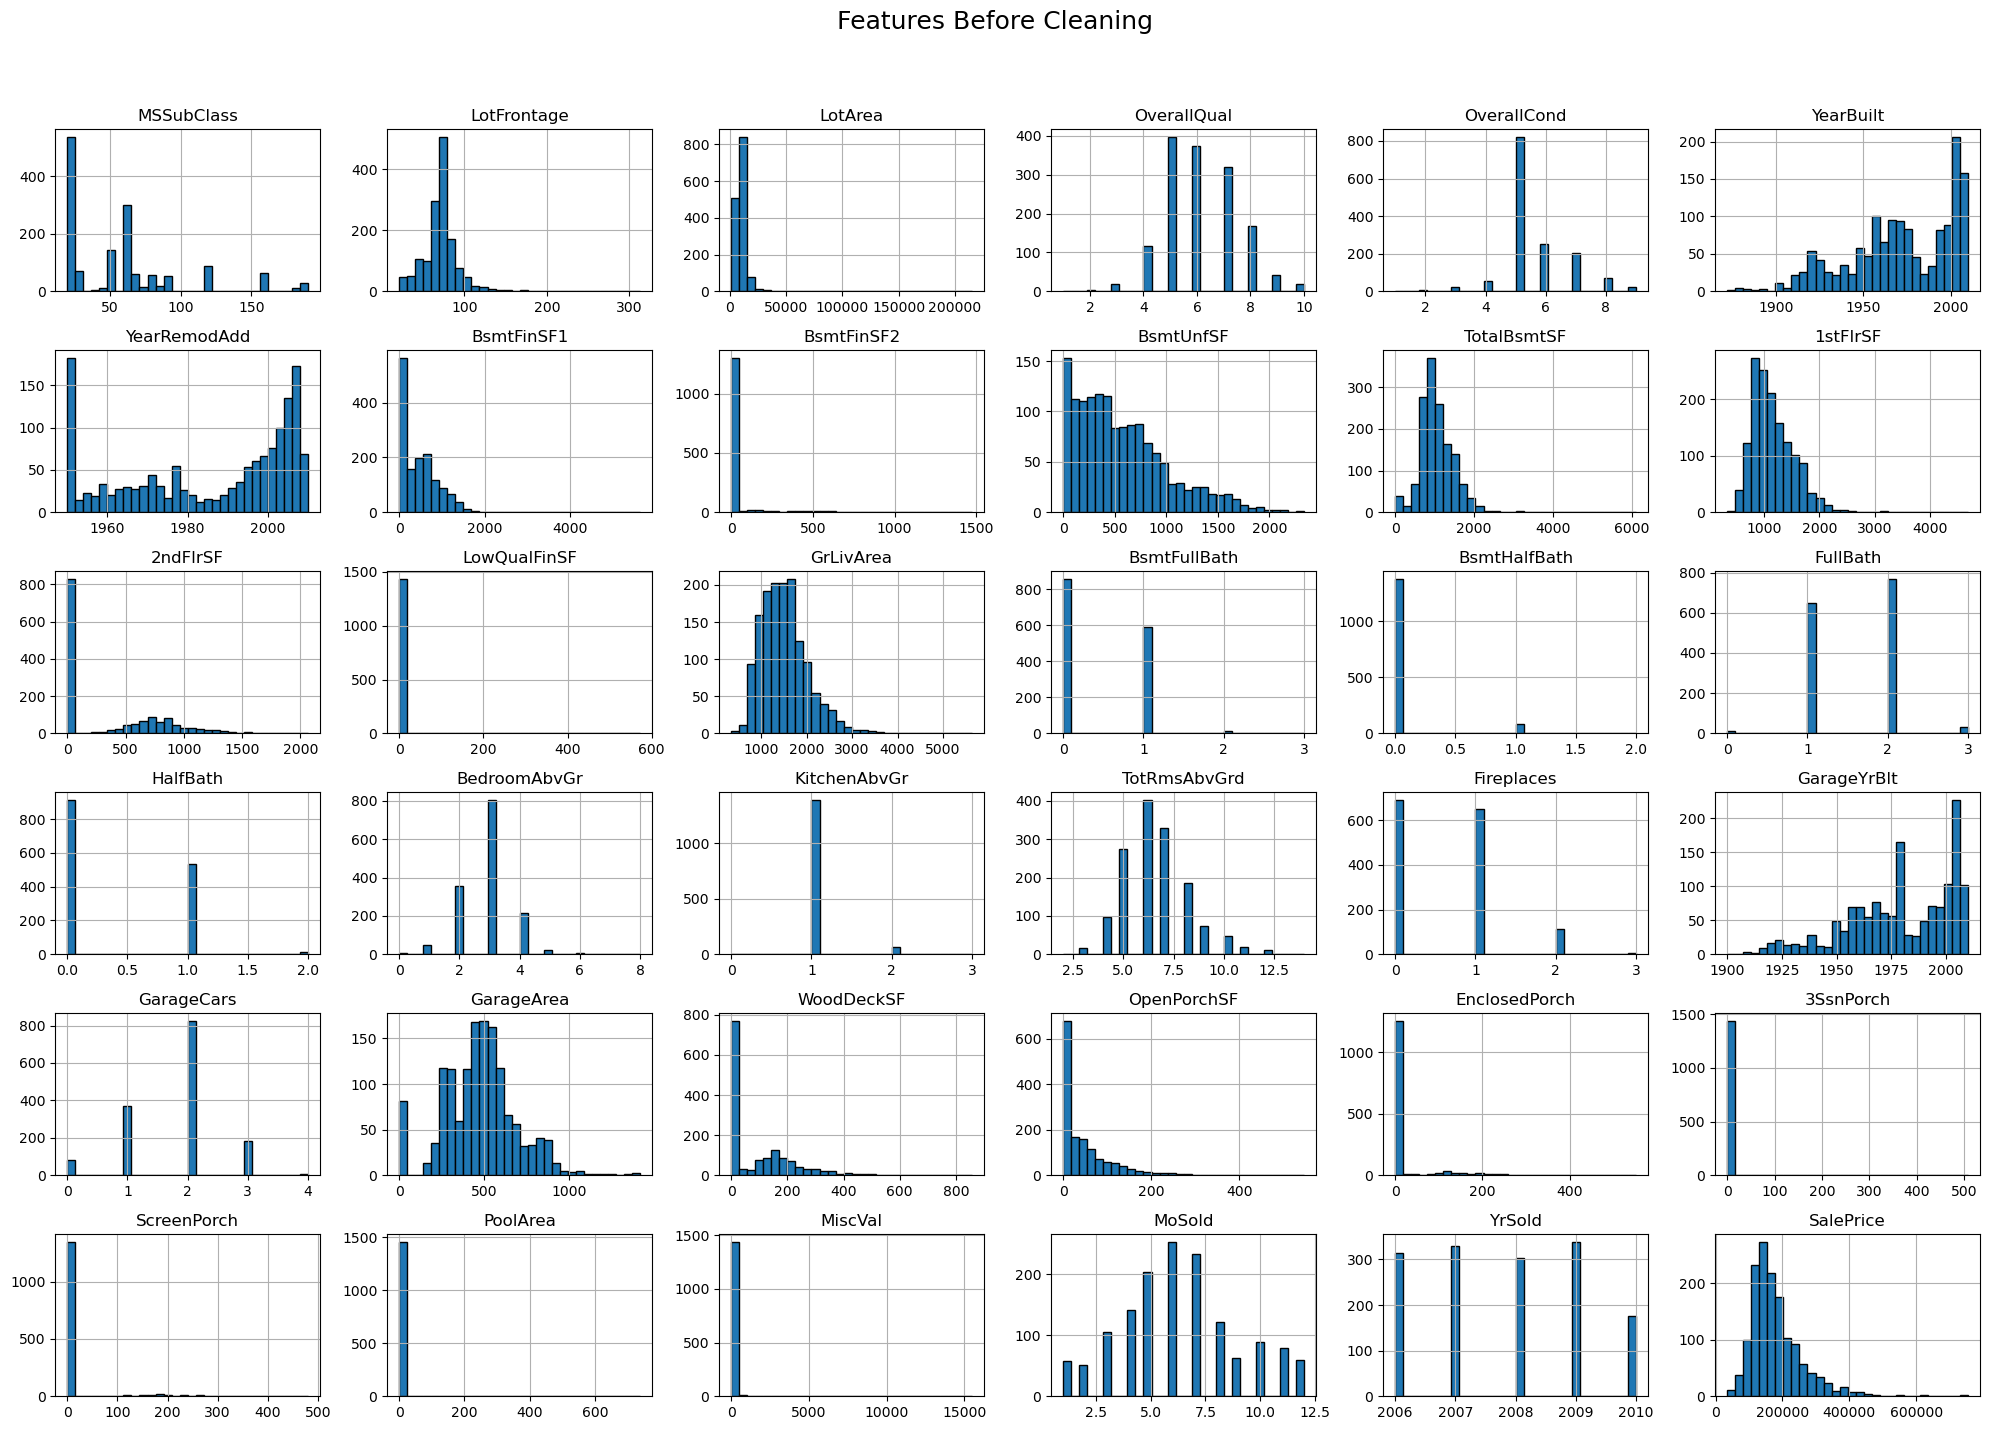

In [395]:
df_train.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Features Before Cleaning", fontsize=18)  # Add title with fontsize
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

In [396]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

In [397]:
mostly_zeros = ["MiscVal", "PoolArea", "ScreenPorch", "3SsnPorch", "KitchenAbvGr", "BsmtHalfBath", "LowQualFinSF", "EnclosedPorch", "BsmtFinSF2"]

In [398]:
df_train.drop(columns=mostly_zeros, inplace=True)
df_test.drop(columns=mostly_zeros, inplace=True)

In [399]:
df_train.shape

(1460, 65)

In [400]:
df_train_filtered = df_train[df_train["LotFrontage"] < 150]

In [401]:
df_train_filtered = df_train_filtered[df_train_filtered["LotArea"] < 25000]

In [402]:
df_train_filtered = df_train_filtered[df_train_filtered["TotalBsmtSF"] < 2250]

In [403]:
df_train_filtered = df_train_filtered[df_train_filtered["2ndFlrSF"] < 1500]

In [404]:
df_train_filtered = df_train_filtered[df_train_filtered["GarageArea"] < 1100]

In [405]:
df_train_filtered = df_train_filtered[df_train_filtered["WoodDeckSF"] < 400]

In [406]:
df_train_filtered = df_train_filtered[df_train_filtered["OpenPorchSF"] < 200]

In [407]:
df_train_filtered = df_train_filtered[df_train_filtered["SalePrice"] < 450000]

In [408]:
df_train_filtered.shape

(1321, 65)

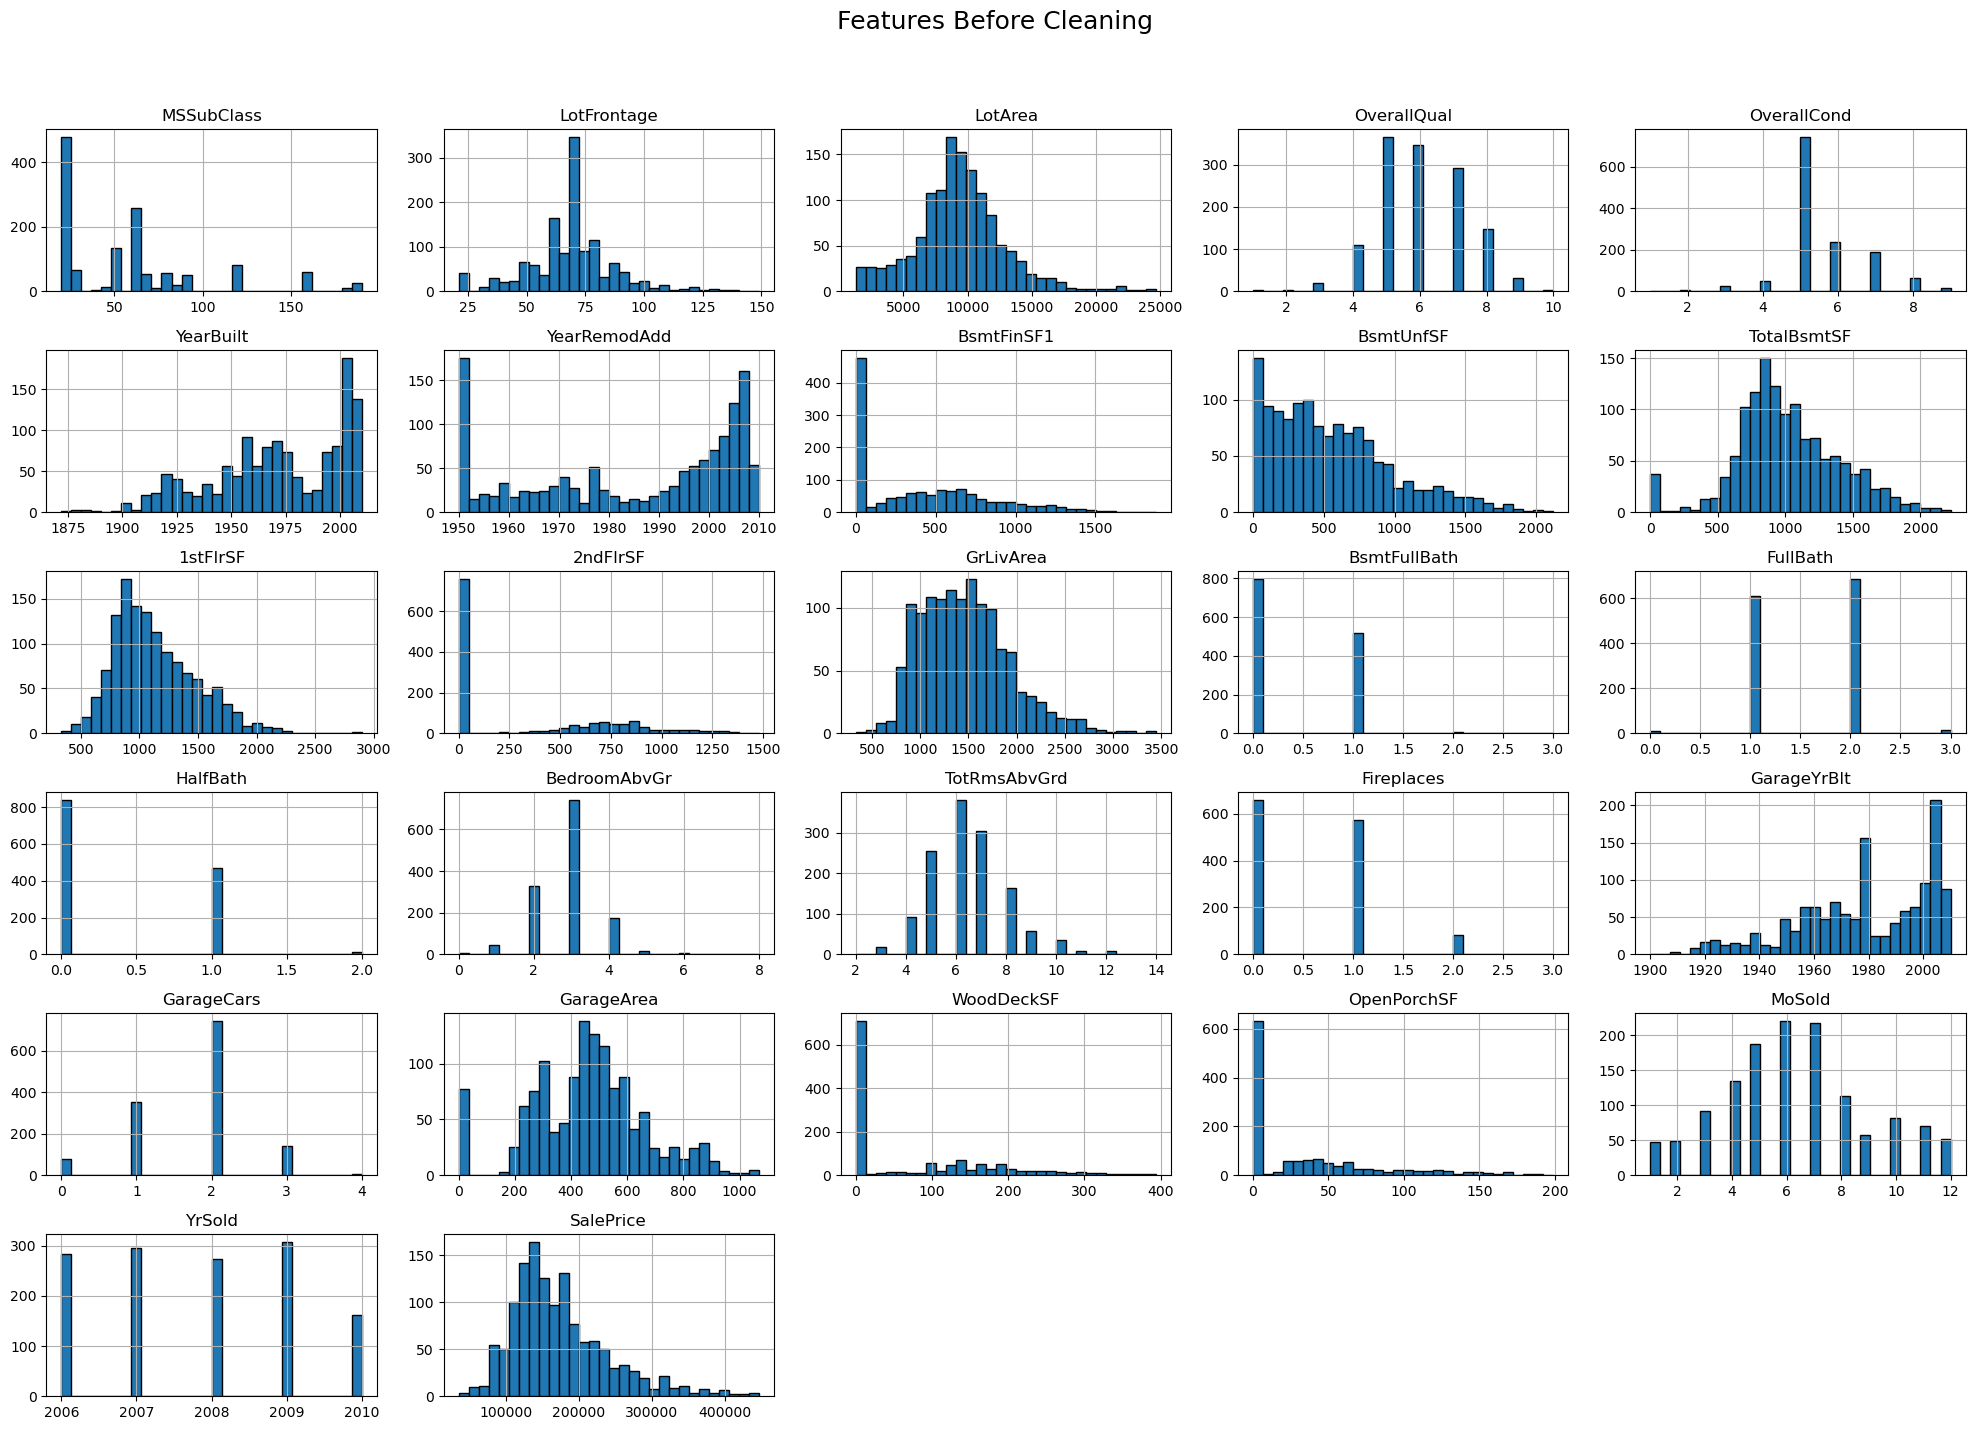

In [409]:
df_train_filtered.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Features Before Cleaning", fontsize=18)  # Add title with fontsize
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

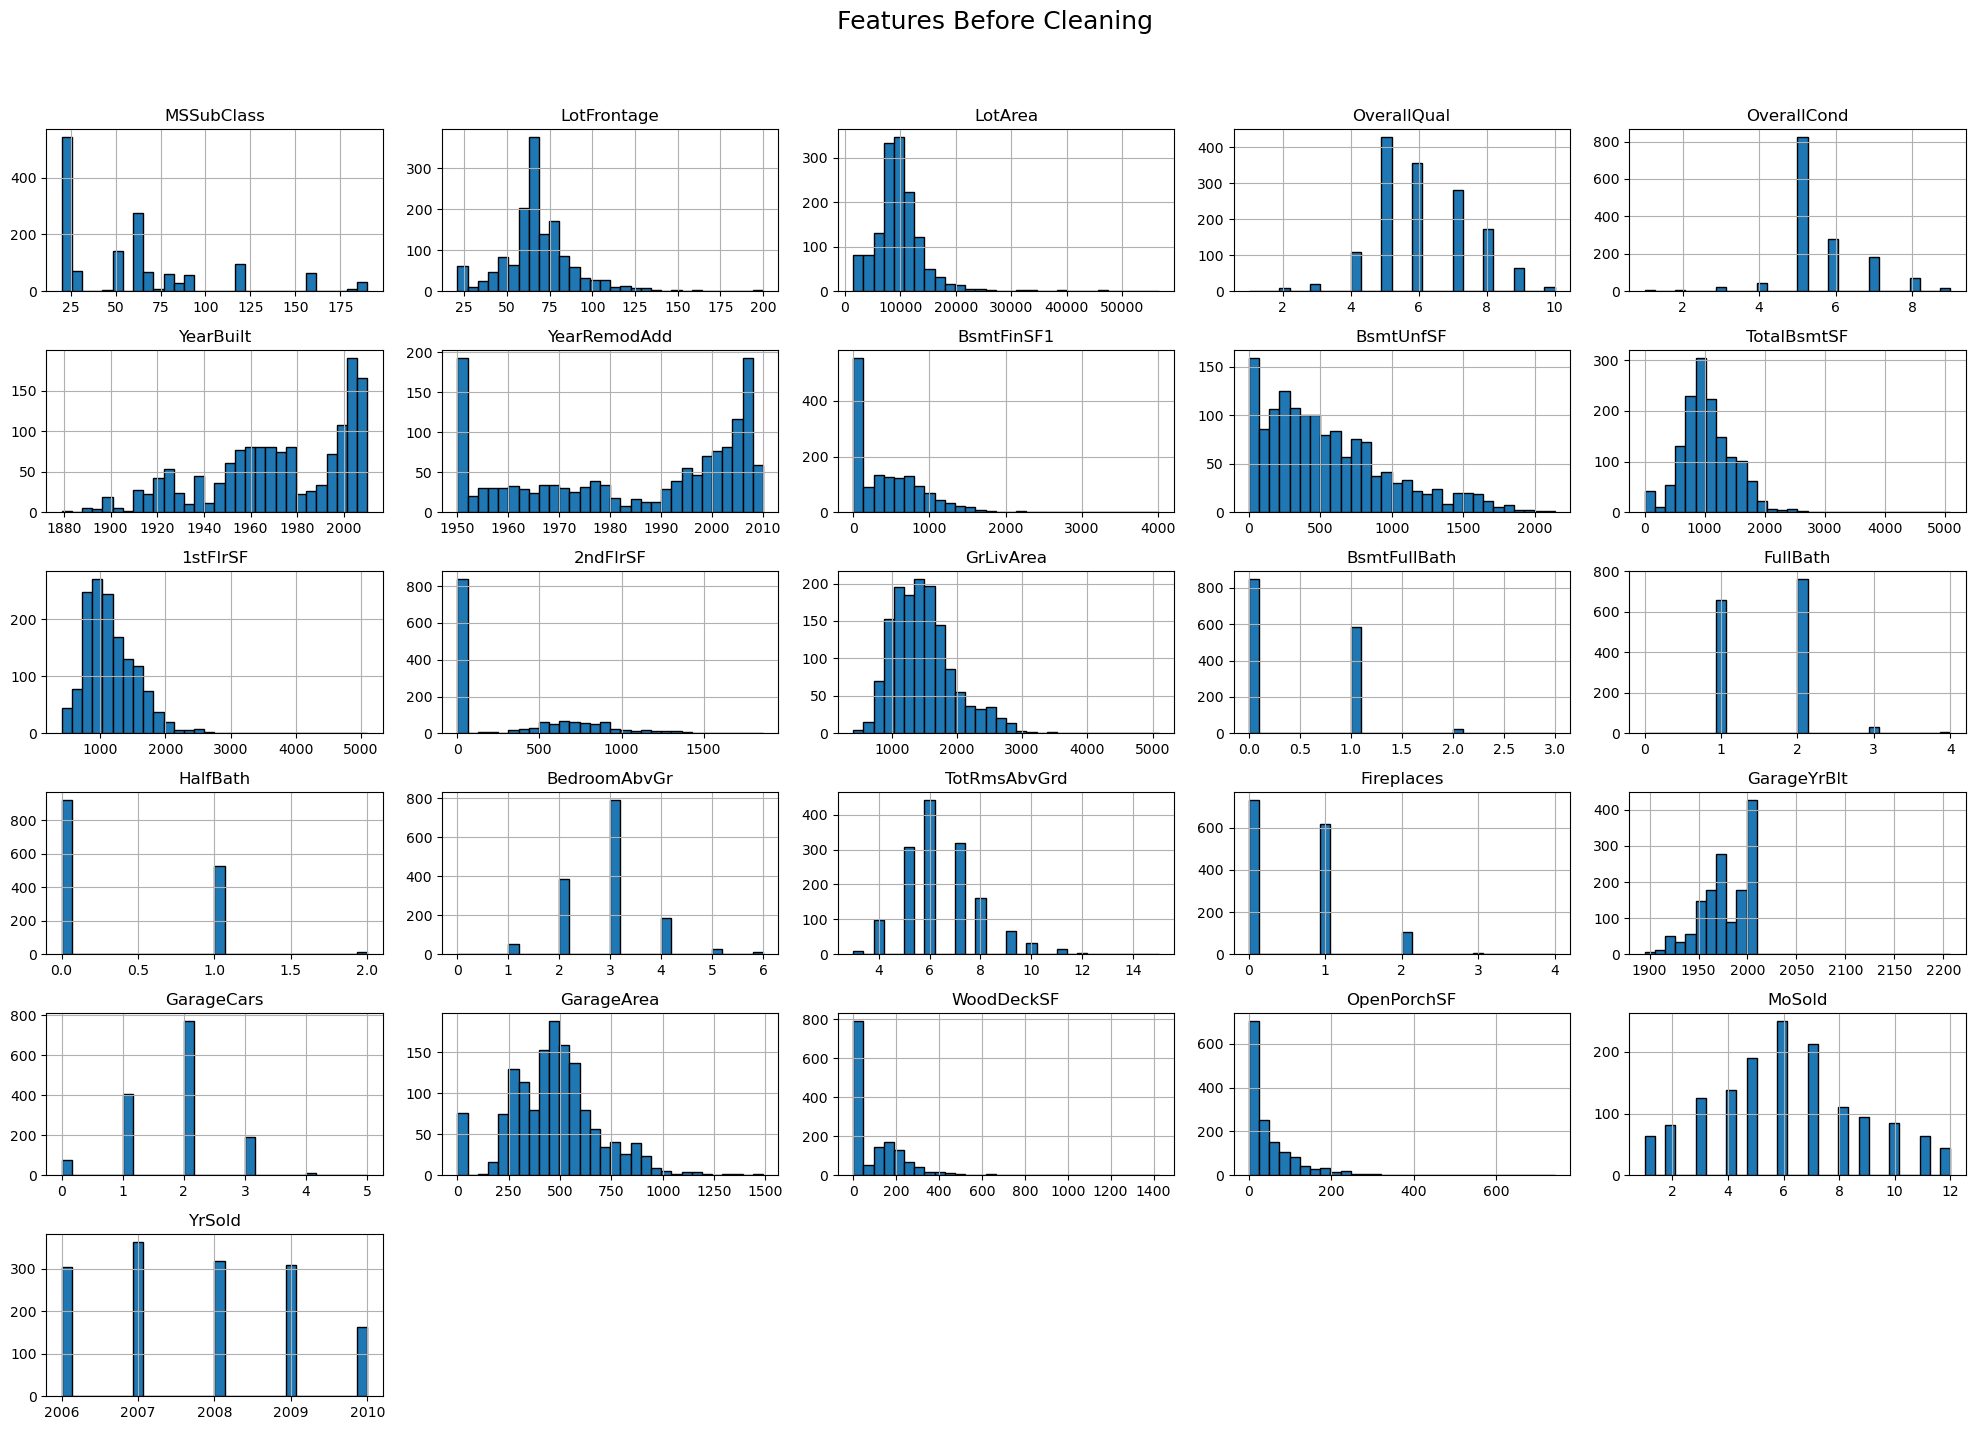

In [410]:
df_test.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Features Before Cleaning", fontsize=18)  # Add title with fontsize
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

In [411]:
df_test_filtered = df_train[df_train["LotFrontage"] < 150]

In [412]:
df_test_filtered = df_test_filtered[df_test_filtered["LotArea"] < 25000]

In [195]:
df_test_filtered = df_test_filtered[df_test_filtered["TotalBsmtSF"] < 2250]

In [196]:
df_test_filtered = df_test_filtered[df_test_filtered["2ndFlrSF"] < 1500]

In [197]:
df_test_filtered = df_test_filtered[df_test_filtered["GarageArea"] < 1100]

In [198]:
df_tset_filtered = df_test_filtered[df_test_filtered["WoodDeckSF"] < 400]

In [199]:
df_test_filtered = df_test_filtered[df_test_filtered["OpenPorchSF"] < 200]

In [200]:
df_test_filtered.shape

(1000, 67)

In [414]:
object_df = df_train_filtered.select_dtypes(include='object')
categorical_features = list(object_df.columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [415]:
df_dum_train = pd.get_dummies(df_train_filtered, columns=categorical_features)
df_dum_test = pd.get_dummies(df_test, columns=categorical_features)

In [416]:
df_dum_train.shape

(1321, 259)

In [417]:
df_dum_test.shape

(1459, 247)

In [418]:
df_dum_train_cols = list(df_dum_train.columns)
df_dum_test_cols = list(df_dum_test.columns)

In [419]:
unique_cols = set(df_dum_test_cols) - set(df_dum_train_cols)
unique_cols

{'Condition2_PosA', 'Condition2_PosN', 'Functional_Sev'}

In [420]:
df_dum_test.drop(columns=list(unique_cols), inplace=True)

In [422]:
unique_cols = set(df_dum_train_cols) - set(df_dum_test_cols)
unique_cols = unique_cols- {"SalePrice"}
unique_cols

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa'}

In [423]:
df_dum_train.drop(columns=list(unique_cols), inplace=True)

In [424]:
df_dum_train.shape

(1321, 245)

In [425]:
df_dum_test.shape

(1459, 244)

In [426]:
correlation = df_dum_train.corr()
correlation['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.805924
GrLivArea       0.698766
GarageCars      0.659664
GarageArea      0.646495
TotalBsmtSF     0.616124
1stFlrSF        0.589353
YearBuilt       0.588239
FullBath        0.560931
YearRemodAdd    0.548498
Name: SalePrice, dtype: float64

In [447]:
threshold = 0.5
selected_features = correlation[abs(correlation['SalePrice']) > threshold]['SalePrice'].index
selected_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc',
       'BsmtQual_Ex', 'BsmtQual_TA', 'KitchenQual_TA'],
      dtype='object')

In [448]:
# Prepare data
X = df_dum_train.drop(['SalePrice'], axis=1)
y = df_dum_train['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [449]:
model = Ridge()
model.fit(X_train_scaled, y_train)

Ridge()

In [450]:
y_pred = model.predict(X_test_scaled)
y_base = [y_train.mean()] * len(y_test)

In [451]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:.2e}')

Mean Squared Error of base model: 4.39e+09


In [452]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:.2e}')
print(f'Mean Squared Error for testing: {mse_test:.2e}')

Mean Squared Error for training: 2.49e+08
Mean Squared Error for testing: 4.99e+08


In [453]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 50424.7782054031


In [454]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 11215.503673773568
Mean Absolute Error for testing: 15117.701932198162


In [464]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.9447194344827399
R Square for testing: 0.8862810723843724


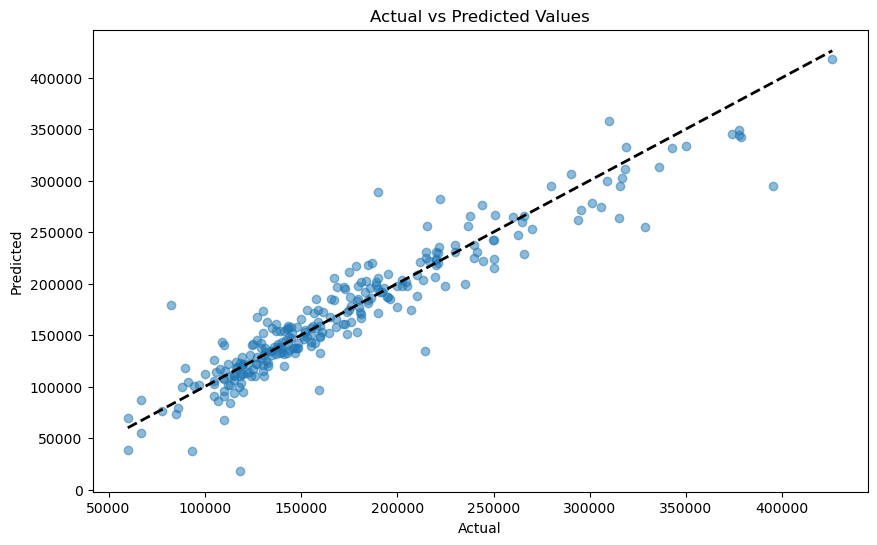

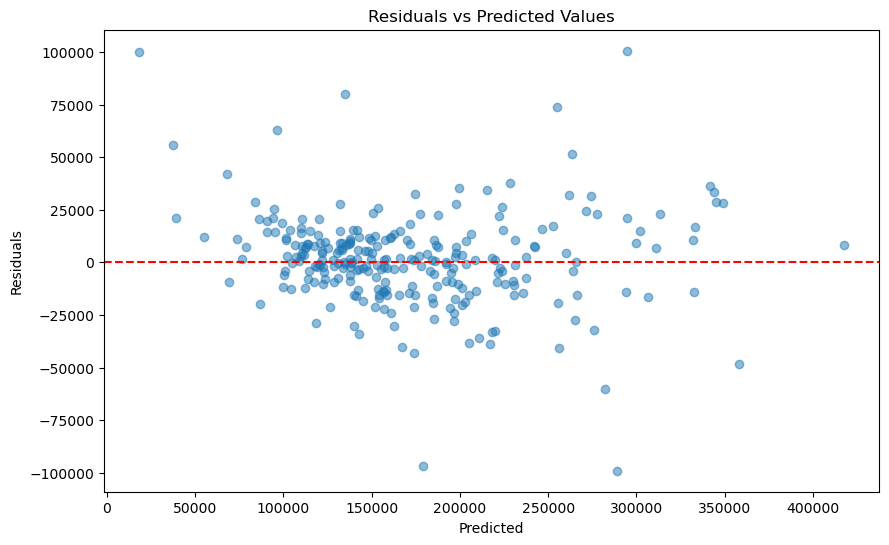

In [456]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()